# Support Vector Machine exercise

Welcome to your first programming assignment! You will build a binary support vectpr machine (SVM) classifier to recognize  cats. This tutorial will step you through how to do this and complete and hand in the completed worksheet for submission.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

## 2 - Data Loading and Preprocessing ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat (Binary Classification).

Let's get more familiar with the dataset. Load the data by running the following code.

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

y = [0], it's a 'non-cat' picture.


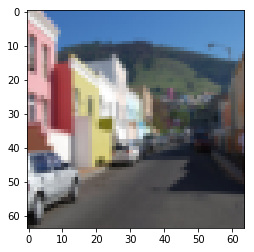

In [3]:
# Example of a picture
index = 1
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

Number of classes: 2


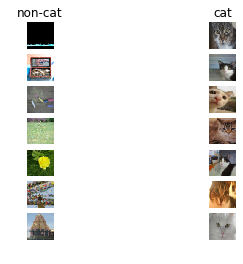

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
num_classes = len(classes)
print('Number of classes: {}'.format(num_classes))
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_set_y == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(train_set_x_orig[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls.decode("utf-8"))
plt.show()

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [5]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

# As a sanity check, we print out the size of the training and test data.
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y[0].shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y[0].shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (209,)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (50,)


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (1, num_px $*$ num_px $*$ 3). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise:** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (1, num\_px $*$ num\_px $*$ 3).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (a, b$*$c$*$d) is to use: 
```python
X_flatten = np.reshape(X, (X.shape[0], -1))      # -1 is interpreted as unspecified value, which will be inferred as b*c*d
```

In [6]:
# Reshape the training and test examples
# Preprocessing: reshape the image data (3-d data) into rows (1-d)

### START CODE HERE ### (≈ 2 lines of code)
print(train_set_x_orig.shape)
train_set_x = np.reshape(train_set_x_orig, (train_set_x_orig.shape[0], -1)) # unspecified value, which will be inferred as 64*64*3 = 12288
test_set_x = np.reshape(test_set_x_orig, (test_set_x_orig.shape[0], -1)) # unspecified value, which will be inferred as 64*64*3 = 12288
train_set_y = train_set_y[0] 
test_set_y = test_set_y[0]
### END CODE HERE ###

# As a sanity check, print out the shapes of the data
print ("train_set_x_flatten shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x[0:5,0]))

(209, 64, 64, 3)
train_set_x_flatten shape: (209, 12288)
train_set_y shape: (209,)
test_set_x_flatten shape: (50, 12288)
test_set_y shape: (50,)
sanity check after reshaping: [ 17 196  82   1   9]


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (209, 12288)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(209, )</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(50, 12288)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(50, )</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 196 82 1 9]</td> 
  </tr>
</table>

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array.

Another preprocessing step that we may add is a simplying trick to represent two parameters **w** and **b**. The following image illustrate the bias trick:
<img src="images/bias_trick.jpeg">
Illustration of the bias trick. Doing a matrix multiplication and then adding a bias vector (left) is equivalent to adding a bias dimension with a constant of 1 to all input vectors and extending the weight matrix by 1 column - a bias column (right). Thus, if we preprocess our data by appending ones to all vectors we only have to learn a single matrix of weights instead of two matrices that hold the weights and the biases.

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !--> 

Let's standardize our dataset.

[ 97 100  88  99 101  88  98 100  87  99]


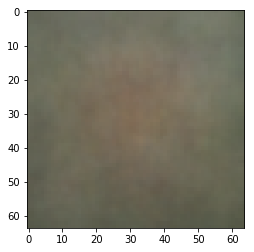

Dimension of data after preprocessing: 
(209, 12289) (50, 12289)


In [7]:
# Preprocessing: subtract the mean image (to center the data)
# first: compute the image mean based on the training data
mean_image = np.mean(train_set_x, axis=0).astype('uint8')
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((64,64,3)).astype('uint8')) # visualize the mean image
plt.show()

# second: subtract the mean image from train and test data
train_set_x -= mean_image
test_set_x -= mean_image

# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
# This is done by extending the vector xi with one additional dimension 
# that always holds the constant 1 - a default bias dimension.
train_set_x = np.hstack([train_set_x, np.ones((train_set_x.shape[0], 1))])
test_set_x = np.hstack([test_set_x, np.ones((test_set_x.shape[0], 1))])

print('Dimension of data after preprocessing: ')
print(train_set_x.shape, test_set_x.shape)

<font color='blue'>
**Summary**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the image data into rows such that each sample is tranformed from (1, num_px , num_px , 3) to (1, num_px \* num_px \* 3)
- "Center" the data
- Apply "Bias Trick" to simply the computing

## 3 - General Architecture of the SVM Classifier ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a SVM classifier, using a Neural Network mindset. 

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)


<!-- ### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$ 
!--> 

As you can see, we have prefilled the function `compute_loss_naive` which uses for loops to evaluate the multiclass SVM loss function. 

### 4.1 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

### 4.2 - Computing the loss (Forward propagation)

**Exercise:** Implement the regularization loss for SVM. 

Reminded that in this particular module we are working with linear score functions ( $\mathcal f(x_{i};W)=Wx_{i} $), so we can also rewrite the loss function in this equivalent form:


$$ \mathcal L_{i}=\sum_{j≠y_{i}} max(0,w^\intercal_{j}x_{i}−w^\intercal_{yi}x_{i}+Δ) $$

where $\mathcal w_{j}$ is the j-th row of $\mathcal W $ reshaped as a column

** Include the regularization penalty completes the full Multiclass Support Vector Machine loss, which is made of two components: the **data loss** (which is the averahe loss $\mathcal L_{i} $ over all examples) and the **regularization loss**. The full Multiclass SVM loss becomes:

$$ \mathcal L= \frac{1}{N}\sum_{I}\sum_{j≠y_{i}} [max(0,f(x_{i};W)_{j}−f(x_{i};W)_{yi}+Δ)] + λ\sum_{k}\sum_{l}W^{2}_{k,l} $$

### 4.3 - Computing the gradient (Backward propagation)

**Exercise:** The grad returned from the function above is right now all zero. Derive and implement the gradient for the SVM cost function and implement it inline inside the function svm_loss_naive(). You will find it helpful to interleave your new code inside the existing function.

In [8]:
def svm_loss_naive(W, X, y, reg):
    """
    Structured SVM loss function, naive implementation (with loops).

    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.

    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < C.
    - reg: (float) regularization strength

    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    """
    dW = np.zeros(W.shape) # 4.1 initialize the gradient as zero

    # compute the loss and the gradient
    num_classes = W.shape[1]
    num_train = X.shape[0]
    loss = 0.0
    for i in range(num_train):
        scores = X[i].dot(W)
        correct_class_score = scores[y[i]]
        for j in range(num_classes):
            if j == y[i]:
                continue
            # 4.2 Compute the loss here
            margin = scores[j] - correct_class_score + 1 # note delta = 1
            if margin > 0:
                loss += margin
                dW[:,j] += X[i].T         # derivatives when j != yi
                dW[:,y[i]] += -X[i].T     # derivatives when j= yi
    
    # Right now the loss is a sum over all training examples, but we want it
    # to be an average instead so we divide by num_train.
    loss /= num_train
    dW /= num_train

    # Add L2 regularization to the loss.
    loss += 0.5 * reg * np.sum(W * W)
    dW += reg * W

    #############################################################################
    # TODO:                                                                     #
    # 4.3 Compute the gradient of the loss function and store it dW.            #
    # Rather that first computing the loss and then computing the derivative,   #
    # it may be simpler to compute the derivative at the same time that the     #
    # loss is being computed. As a result you may need to modify some of the    #
    # code above to compute the gradient.                                       #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    #pass

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW

In [9]:
# Evaluate the naive implementation of the loss we provided for you:
import time

# generate a random SVM weight matrix of small numbers
W = np.random.randn(12289, 2) * 0.0001 

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
loss, grad = svm_loss_naive(W, train_set_x, train_set_y, 0.000005)
print('loss: %f' % (loss, ))
print('gradient: {}'.format(grad))

loss: 1.240501
gradient: [[-48.78468899  48.78468899]
 [-39.8277512   39.8277512 ]
 [-45.65550239  45.65550239]
 ...
 [-42.90430622  42.90430622]
 [-49.85645933  49.85645933]
 [ -0.27272727   0.27272727]]


### 4.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the loss function $L$. For a parameter $W$, the update rule is $ W = W - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

### Stochastic Gradient Descent

We now have vectorized and efficient expressions for the loss, the gradient and our gradient matches the numerical gradient. We are therefore ready to do SGD to minimize the loss.

In [16]:
class LinearClassifier(object):

    def __init__(self):
        self.W = None
        self.learning_rate = 1e-3
        self.reg = 1e-5
        self.y_pred = None

    def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100,
              batch_size=200, verbose=False):
        """
        Train this linear classifier using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.
        - y: A numpy array of shape (N,) containing training labels; y[i] = c
          means that X[i] has label 0 <= c < C for C classes.
        - learning_rate: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - num_iters: (integer) number of steps to take when optimizing
        - batch_size: (integer) number of training examples to use at each step.
        - verbose: (boolean) If true, print progress during optimization.

        Outputs:
        A list containing the value of the loss function at each training iteration.
        """
        num_train, dim = X.shape
        num_classes = np.max(y) + 1 # assume y takes values 0...K-1 where K is number of classes
        
        self.learning_rate = learning_rate
        self.reg = reg
        
        if self.W is None:
            # lazily initialize W
            self.W = 0.001 * np.random.randn(dim, num_classes)

        # Run stochastic gradient descent to optimize W
        loss_history = []
        for it in range(num_iters):
            X_batch = None
            y_batch = None

            #########################################################################
            # TODO:                                                                 #
            # Sample batch_size elements from the training data and their           #
            # corresponding labels to use in this round of gradient descent.        #
            # Store the data in X_batch and their corresponding labels in           #
            # y_batch; after sampling X_batch should have shape (batch_size, dim)   #
            # and y_batch should have shape (batch_size,)                           #
            #                                                                       #
            # Hint: Use np.random.choice to generate indices. Sampling with         #
            # replacement is faster than sampling without replacement.              #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            batch_idx = np.random.choice(num_train, batch_size, replace = True)
            X_batch =  X[batch_idx]
            y_batch = y[batch_idx]
            #pass

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            # evaluate loss and gradient
            loss, grad = self.loss(X_batch, y_batch, reg)
            loss_history.append(loss)

            # perform parameter update
            #########################################################################
            # TODO:                                                                 #
            # 4.4 Update the weights using the gradient and the learning rate.          #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            self.W += - learning_rate * grad    # Stochastic Gradient Descent
            #pass

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            if verbose and it % 100 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))

        return loss_history

    def predict(self, X):
        """
        Use the trained weights of this linear classifier to predict labels for
        data points.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.

        Returns:
        - y_pred: Predicted labels for the data in X. y_pred is a 1-dimensional
          array of length N, and each element is an integer giving the predicted
          class.
        """
        y_pred = np.zeros(X.shape[0])
        ###########################################################################
        # TODO:                                                                   #
        # Implement this method. Store the predicted labels in y_pred.            #
        ###########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        scores = X.dot(self.W)
        y_pred = np.argmax(scores, axis = 1)
        #pass

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.y_pred = y_pred
        return y_pred
    
    def loss(self, X_batch, y_batch, reg):
        pass

In [17]:
class LinearSVM(LinearClassifier):
    """ A subclass that uses the Multiclass SVM loss function """

    def loss(self, X_batch, y_batch, reg):
        return svm_loss_naive(self.W, X_batch, y_batch, reg)


In [26]:
# Implement SGD in the function LinearClassifier.train() 
# and then run it with the code below.
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(train_set_x, train_set_y, learning_rate=1e-7, reg=1.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 192.112743
iteration 100 / 1500: loss 140.588996
iteration 200 / 1500: loss 103.759311
iteration 300 / 1500: loss 76.388670
iteration 400 / 1500: loss 56.019703
iteration 500 / 1500: loss 41.513961
iteration 600 / 1500: loss 30.769752
iteration 700 / 1500: loss 22.789935
iteration 800 / 1500: loss 17.042279
iteration 900 / 1500: loss 12.588183
iteration 1000 / 1500: loss 9.431042
iteration 1100 / 1500: loss 6.982272
iteration 1200 / 1500: loss 5.210568
iteration 1300 / 1500: loss 4.533425
iteration 1400 / 1500: loss 2.950937
That took 14.216591s


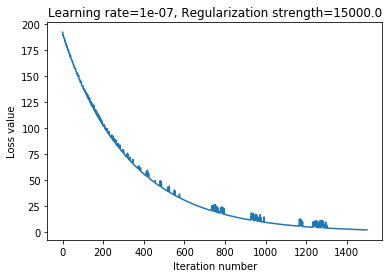

In [27]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.title("Learning rate={}, Regularization strength={}" .format(str(svm.learning_rate), str(svm.reg)))
plt.show()

**Interpretation**:
You can see the loss decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

**Exercise:** Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = (w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `y_pred`. If you wish, you can use `np.argmax` to give the index of the maximum value.

In [28]:
# Write the LinearSVM.predict function and evaluate the performance on both the
# training and validation set
y_train_pred = svm.predict(train_set_x)
print('training accuracy: %f' % (np.mean(train_set_y == y_train_pred), ))
y_val_pred = svm.predict(test_set_x)
print('validation accuracy: %f' % (np.mean(test_set_y == y_val_pred), ))

training accuracy: 1.000000
validation accuracy: 0.640000


In [31]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.64 on the validation set.

#Note: you may see runtime/overflow warnings during hyper-parameter search. 
# This may be caused by extreme values, and is not a bug.

learning_rates = [1e-7, 5e-5, 1.6e-7]
regularization_strengths = [1.5e4, 2.5e4, 5e4]
# learning_rates = [1.4e-7, 1.5e-7, 1.6e-7]
# regularization_strengths = [(1+i*0.1)*1e4 for i in range(-3,3)] + [(2+0.1*i)*1e4 for i in range(-3,3)]

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.

################################################################################
# TODO:                                                                        #
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear SVM on the      #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the LinearSVM object that achieves this  #
# accuracy in best_svm.                                                        #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your         #
# validation code so that the SVMs don't take much time to train; once you are #
# confident that your validation code works, you should rerun the validation   #
# code with a larger value for num_iters.                                      #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
for rs in regularization_strengths:
    for lr in learning_rates:
        svm = LinearSVM()
        loss_hist = svm.train(train_set_x, train_set_y, lr, rs, num_iters=1500)
        
        y_train_pred = svm.predict(train_set_x)
        train_accuracy = np.mean(train_set_y == y_train_pred)
        
        y_val_pred = svm.predict(test_set_x)
        val_accuracy = np.mean(test_set_y == y_val_pred)
        
        if val_accuracy > best_val: # save the best performed SVM instance
            best_val = val_accuracy
            best_svm = svm           
        results[(lr,rs)] = train_accuracy, val_accuracy
#pass
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

/Users/irisliu/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
/Users/irisliu/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in multiply


lr 1.000000e-07 reg 1.500000e+04 train accuracy: 0.947368 val accuracy: 0.440000
lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.990431 val accuracy: 0.720000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.507177 val accuracy: 0.620000
lr 1.600000e-07 reg 1.500000e+04 train accuracy: 0.655502 val accuracy: 0.340000
lr 1.600000e-07 reg 2.500000e+04 train accuracy: 0.593301 val accuracy: 0.640000
lr 1.600000e-07 reg 5.000000e+04 train accuracy: 0.497608 val accuracy: 0.640000
lr 5.000000e-05 reg 1.500000e+04 train accuracy: 0.344498 val accuracy: 0.660000
lr 5.000000e-05 reg 2.500000e+04 train accuracy: 0.655502 val accuracy: 0.340000
lr 5.000000e-05 reg 5.000000e+04 train accuracy: 0.655502 val accuracy: 0.340000
best validation accuracy achieved during cross-validation: 0.720000


#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` and `regularization_strengths` variable to contain, and see what happens. 

**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test accuracy is 66%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

Using the code below, you can look at cross-validation results as well as the learned weights for each class.

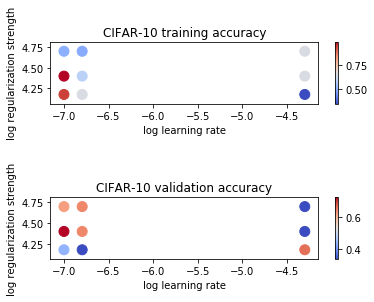

In [32]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

plt.subplots_adjust(hspace = 1.5) # space in term of height between subplots

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [33]:
# Evaluate the best svm on test set
y_test_pred = best_svm.predict(test_set_x)
test_accuracy = np.mean(test_set_y == y_test_pred)
print('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

linear SVM on raw pixels final test set accuracy: 0.720000


**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.) 


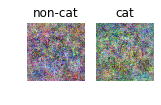

In [34]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
w = best_svm.W[:-1,:] # strip out the bias
w = w.reshape(64, 64, 3, 2)
w_min, w_max = np.min(w), np.max(w)
classes = classes
for i in range(2):
    plt.subplot(2, 5, i + 1)
      
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i].decode("utf-8"))

<font color='blue'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

Reference:
- http://cs231n.github.io/linear-classify/
- http://cs231n.github.io/assignments2019/assignment1/
- https://www.youtube.com/watch?v=CS4cs9xVecg&list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0